<a href="https://colab.research.google.com/github/JungyuBaeck/Jungyu-astron1221/blob/main/calculating_Hubble_constant_using_Type_1a_Supernovae.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.ascii
import astropy.units as u
import astropy.constants as ac


In [ ]:
#import document file
from google.colab import files
uploaded = files.upload()

Saving Tonry_2003.vot to Tonry_2003.vot


In [ ]:
#Let it read the data from the file uploaded
dat = astropy.io.ascii.read("Tonry_2003.vot")
print(dat)

/usr/local/lib/python3.10/dist-packages/astropy/io/ascii/html.py:91: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  soup = BeautifulSoup("\n".join(lines))


  col1     col2    col3   col4    col5    col6  col7  col8  col9  col10    col11  
-------- ------- ------- ------ -------- ----- ----- ----- ----- -------- --------
 SN1972E  314.84   30.08 0.0023    N5253    16 2.839 2.399 0.033 204.9697 -31.6692
 SN1980N 240.161 -56.689 0.0056    N1316     9 3.225  3.14 0.043  50.6753 -37.2074
 SN1981B  292.97  64.743 0.0072    N4536     2 3.334 3.077 0.041 188.6233   2.1995
 SN1981D 240.161 -56.689 0.0056    N1316     9 3.225 3.044 0.055  50.6753 -37.2074
 SN1986G 309.543  19.401 0.0027    N5128    26 2.908  2.44 0.035 201.4028 -43.0316
 SN1988U   8.737 -81.227   0.31     Anon    24 4.968 5.096 0.072   3.5756 -30.4164
 SN1989B 241.991  64.403 0.0036    N3627    37 3.033 2.844  0.03 170.0578  12.9718
 SN1990N 294.369  75.987 0.0044    N4639    21  3.12 3.204 0.035 190.7367  13.2566
 SN1990O  37.654   28.36 0.0307 M+034403    10 3.964 3.977 0.025 258.8999  16.3241
 SN1990T 341.503 -31.526   0.04   P63925    10 4.079 4.101 0.042 299.7601 -56.2583
    

Text(0, 0.5, 'Velocity [km/s]')

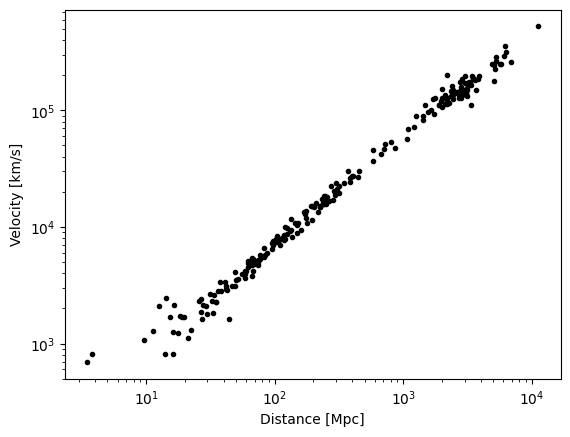

In [ ]:
#analyze the relationship between distance and velocity in linear scale
distance = 10**dat["col8"] / 72.0 * u.mpc
distance_error = (10**(dat["col8"]+dat["col9"]) - 10**dat["col8"]) / 72.0 * u.mpc
velocity = 10**dat["col7"] * u.km / u.s
#Plotting the data in linear scale.
plt.plot(distance.to(u.mpc).value, velocity.to(u.km / u.s).value, marker=".", color="black", linestyle="none")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Distance [Mpc]")
plt.ylabel("Velocity [km/s]")

Text(0, 0.5, 'Velocity [km/s]')

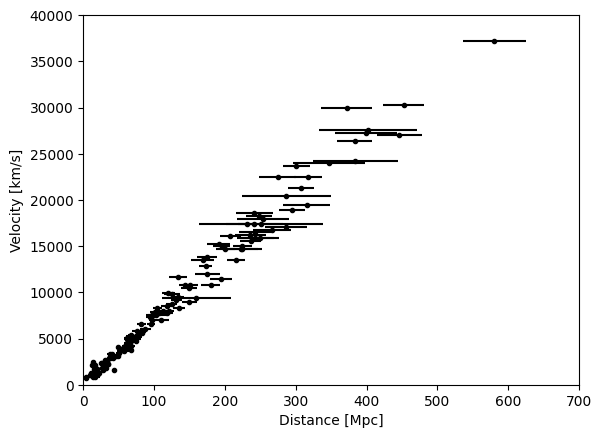

In [ ]:
plt.errorbar(distance.to(u.mpc).value, velocity.to(u.km / u.s).value, xerr=distance_error.to(u.mpc).value, marker=".", color="black", linestyle="none")
#errorbar indicate the uncertainties in the distance measurements.
plt.xlim(0, 700)
plt.ylim(0, 4e4)
plt.xlabel("Distance [Mpc]")
plt.ylabel("Velocity [km/s]")

In [ ]:
#finding a slope
x = distance.to(u.mpc).value #getting value of the distance and assign to the variable x
ind = np.where((x > 0) & (x < 700)) #finds the indices of the distances between 0 and 700
z = np.polyfit(distance.to(u.mpc).value[ind], velocity.to(u.km / u.s).value[ind], 1) #calculates the coefficients of a first-degree polynomial
p = np.poly1d(z) #create a polynomial function
velocity_model = p(distance.to(u.mpc).value) #evaluate the polynomial function at the distance values


In [ ]:
# Calculate the Hubble constant from the slope
H0 = z[0] * u.km / u.s / u.mpc

# Print the measured Hubble constant
print("Measured Hubble constant:", H0)

# Calculate the age of the Universe
age_universe = (1 / H0).to(u.Gyr)

# Print the calculated age of the Universe
print("Age of the Universe:", age_universe)


Measured Hubble constant: 67.48137250840927 km / (mpc s)
Age of the Universe: 1.4489809340480449e-08 Gyr


Text(50, 30000, 'H0 = 67.48 km/s/Mpc')

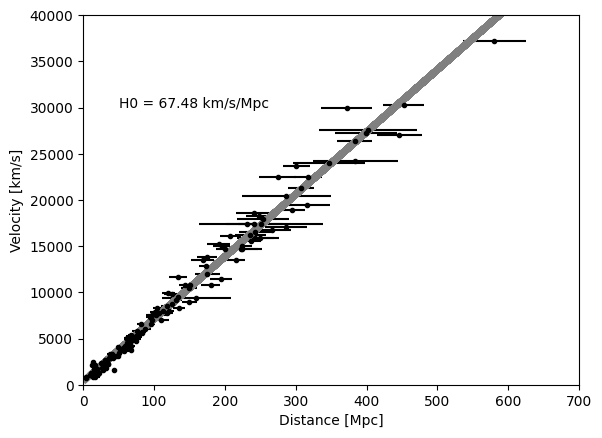

In [ ]:
plt.errorbar(distance.to(u.mpc).value, velocity.to(u.km / u.s).value, xerr=distance_error.to(u.mpc).value, marker=".", color="black", linestyle="none")
plt.plot(distance.to(u.mpc).value, velocity_model, color="grey", linewidth=5)#graph a linear equation based on velocity_model
plt.xlim(0, 700)
plt.ylim(0, 4e4)
plt.xlabel("Distance [Mpc]")
plt.ylabel("Velocity [km/s]")
plt.annotate(r"H0 = {0:5.2f} km/s/Mpc".format(z[0]), xy=(50, 30000)) #annotate hubble constant on the graph
